In [ ]:
import pandas as pd
import numpy as np
import plotly as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
import warnings

from IPython.display import Image
import plotly
print(plotly.__version__)
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

5.15.0


In [ ]:
df = pd.read_csv('/content/tested.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


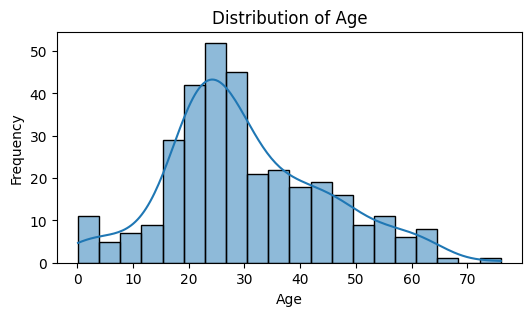

In [ ]:
plt.figure(figsize=(6, 3))
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

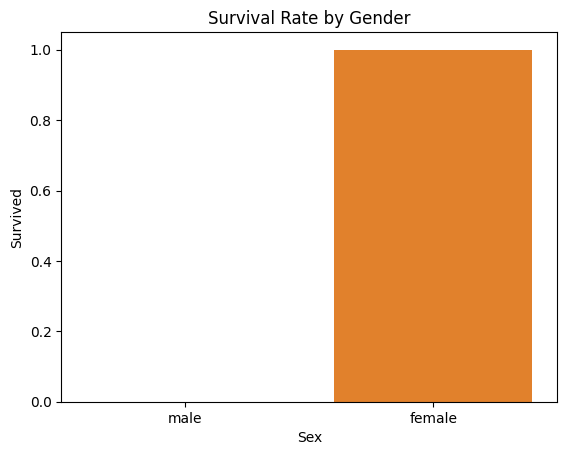

In [ ]:
sns.barplot(x='Sex', y='Survived', data=df)
plt.title('Survival Rate by Gender')
plt.show()

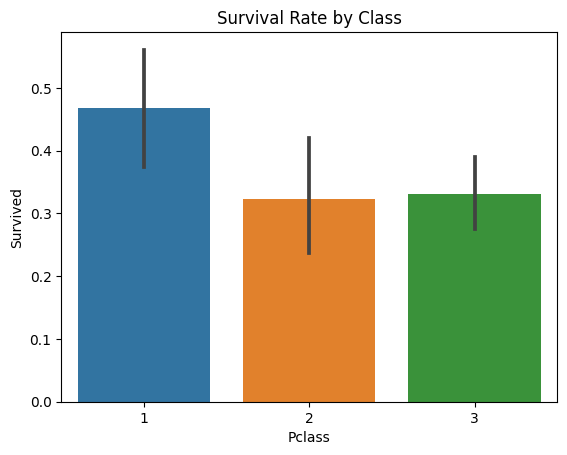

In [ ]:
sns.barplot(x='Pclass', y='Survived', data=df)
plt.title('Survival Rate by Class')
plt.show()

<ipython-input-12-6db9449493df>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


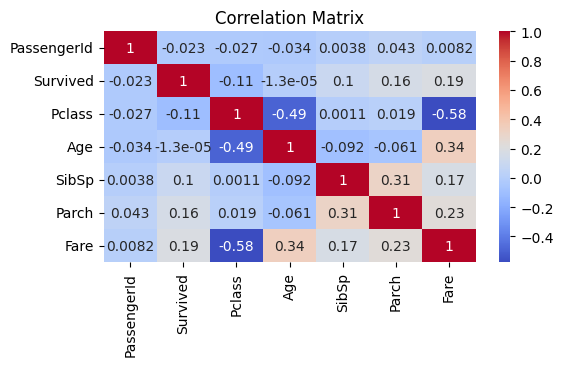

In [ ]:
correlation_matrix = df.corr()
plt.figure(figsize=(6, 3))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

In [ ]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
FamilySize       0
dtype: int64

In [ ]:
df.Pclass.unique()

array([3, 2, 1])

In [ ]:
df.Embarked.unique()

array(['Q', 'S', 'C'], dtype=object)

In [ ]:
df.groupby("Sex").Survived.value_counts()

Sex     Survived
female  1           152
male    0           266
Name: Survived, dtype: int64

   Class  Total
0      3    218
1      1    107
2      2     93


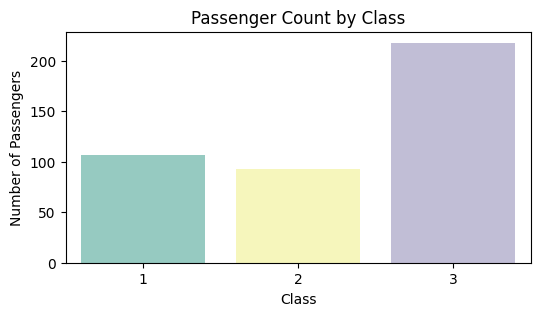

In [ ]:
# Count the number of passengers in each class

class_=pd.DataFrame(df.Pclass.value_counts().reset_index().rename(columns={"index":"Class","Pclass":"Total"}))
print(class_)
class_counts = df['Pclass'].value_counts()

# Create a bar plot to visualize the class distribution
plt.figure(figsize=(6, 3))
sns.barplot(x=class_counts.index, y=class_counts.values, palette='Set3')
plt.title('Passenger Count by Class')
plt.xlabel('Class')
plt.ylabel('Number of Passengers')
plt.show()

  port  Total
0    S    270
1    C    102
2    Q     46


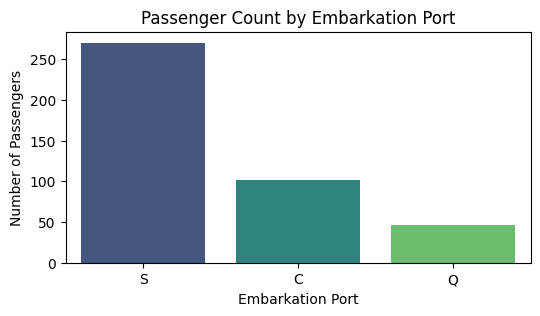

In [ ]:
ps=pd.DataFrame(df.Embarked.value_counts().reset_index().rename(columns={"index":"port","Embarked":"Total"}))
print(ps)


port_counts = df['Embarked'].value_counts()
plt.figure(figsize=(6, 3))
sns.barplot(x=port_counts.index, y=port_counts.values, palette='viridis')
plt.title('Passenger Count by Embarkation Port')
plt.xlabel('Embarkation Port')
plt.ylabel('Number of Passengers')
plt.show()

Number of females who survived: 152
Number of females who did not survive: 0


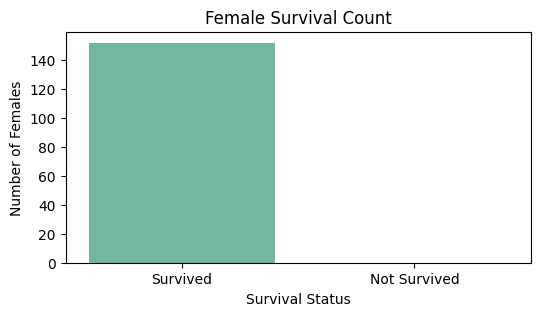

In [ ]:
# Filter the dataset to include only females
female_passengers = df[df['Sex'] == 'female']

# Count the number of females who survived
female_survived = female_passengers[female_passengers['Survived'] == 1]

# Display the count of females who survived
num_female_survived = len(female_survived)
# Count the number of females who did not survive
num_female_not_survived = len(female_passengers) - num_female_survived

print(f'Number of females who survived: {num_female_survived}')
print(f'Number of females who did not survive: {num_female_not_survived}')


# Create a bar plot to visualize female survival
plt.figure(figsize=(6, 3))
sns.barplot(x=['Survived', 'Not Survived'], y=[num_female_survived, num_female_not_survived], palette='Set2')
plt.title('Female Survival Count')
plt.xlabel('Survival Status')
plt.ylabel('Number of Females')
plt.show()

Number of males who survived: 0
Number of males who did not survive: 266


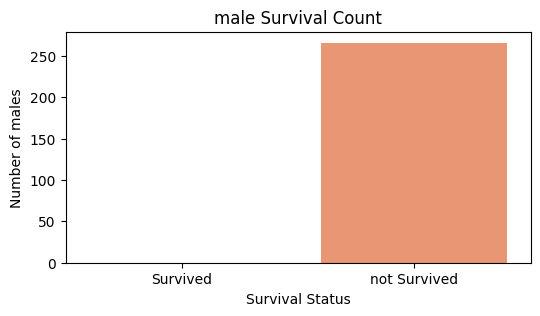

In [ ]:
# Filter the dataset to include only males
male_passengers = df[df['Sex'] == 'male']

# Count the number of males who did survive
male_survived = male_passengers[male_passengers['Survived'] == 1]
num_male_survived = len(male_survived)

# Count the number of males who did not survive
male_not_survived = male_passengers[male_passengers['Survived'] != 1]
num_male_not_survived = len(male_not_survived)



print(f'Number of males who survived: 0')
print(f'Number of males who did not survive: 266')


# Create a bar plot to visualize female survival
plt.figure(figsize=(6, 3))
sns.barplot(x=['Survived', 'not Survived'], y=[num_male_survived, num_male_not_survived], palette='Set2')
plt.title('male Survival Count')
plt.xlabel('Survival Status')
plt.ylabel('Number of males')
plt.show()

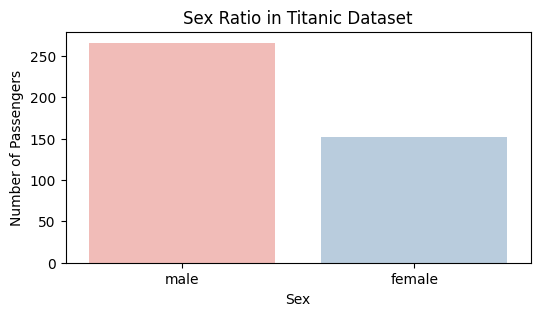

Sex Ratio in Titanic Dataset:
male      266
female    152
Name: Sex, dtype: int64


In [ ]:
# Count the number of males and females
sex_counts = df['Sex'].value_counts()


# Create a bar plot to visualize the sex ratio
plt.figure(figsize=(6, 3))
sns.barplot(x=sex_counts.index, y=sex_counts.values, palette='Pastel1')
plt.title('Sex Ratio in Titanic Dataset')
plt.xlabel('Sex')
plt.ylabel('Number of Passengers')
plt.show()

# Print the sex ratio
print('Sex Ratio in Titanic Dataset:')
print(sex_counts)

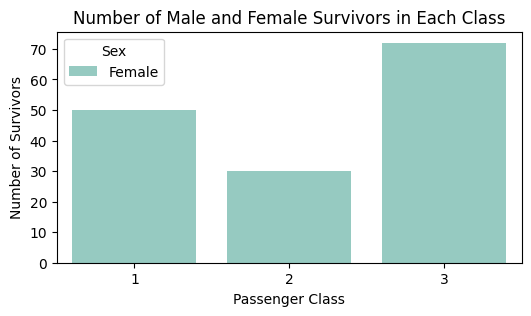

Number of Male and Female Survivors in Each Class:
Sex     female
Pclass        
1           50
2           30
3           72


In [ ]:
# Filter the dataset to include only survivors
survivors = df[df['Survived'] == 1]

# Create a bar plot to visualize the number of male and female survivors in each class
plt.figure(figsize=(6, 3))
sns.countplot(data=survivors, x='Pclass', hue='Sex', palette='Set3')
plt.title('Number of Male and Female Survivors in Each Class')
plt.xlabel('Passenger Class')
plt.ylabel('Number of Survivors')
plt.legend(title='Sex', labels=['Female', 'Male'])
plt.show()

# Count the number of male and female survivors in each class
survivors_by_class = survivors.groupby(['Pclass', 'Sex']).size().unstack()
print('Number of Male and Female Survivors in Each Class:')
print(survivors_by_class)


In [ ]:
df.groupby('Sex').Survived.value_counts(normalize=True)

Sex     Survived
female  1           1.0
male    0           1.0
Name: Survived, dtype: float64

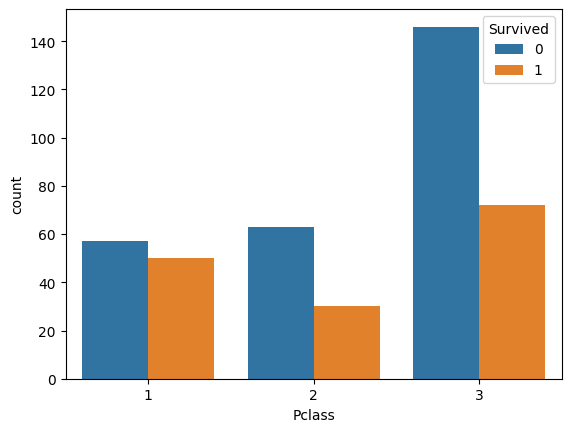

In [ ]:
sns.countplot(data=df, x='Pclass', hue='Survived');

In [ ]:
 df.Survived.value_counts(normalize=True)

0    0.636364
1    0.363636
Name: Survived, dtype: float64

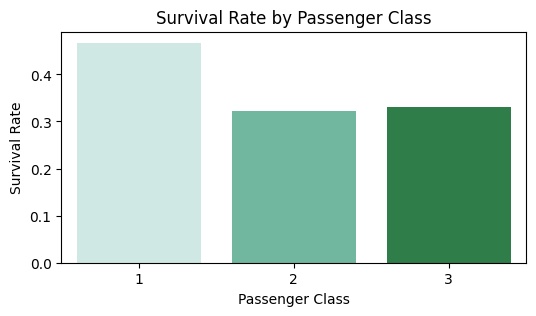

Survival Rate by Passenger Class:
Pclass
1    0.467290
2    0.322581
3    0.330275
Name: Survived, dtype: float64


In [ ]:
# Calculate survival rate by passenger class
survival_rate_by_class = df.groupby('Pclass')['Survived'].mean()

# Create a bar plot to visualize survival rate by passenger class
plt.figure(figsize=(6, 3))
sns.barplot(x=survival_rate_by_class.index, y=survival_rate_by_class.values, palette='BuGn')
plt.title('Survival Rate by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.show()

# Print the survival rate by passenger class
print('Survival Rate by Passenger Class:')
print(survival_rate_by_class)

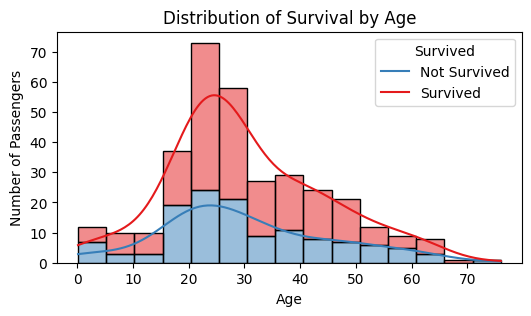

In [ ]:
# Create a histogram of ages for passengers who survived and those who did not
plt.figure(figsize=(6, 3))
sns.histplot(data=df, x='Age', hue='Survived', multiple='stack', kde=True, palette='Set1')
plt.title('Distribution of Survival by Age')
plt.xlabel('Age')
plt.ylabel('Number of Passengers')
plt.legend(title='Survived', labels=['Not Survived', 'Survived'])
plt.show()

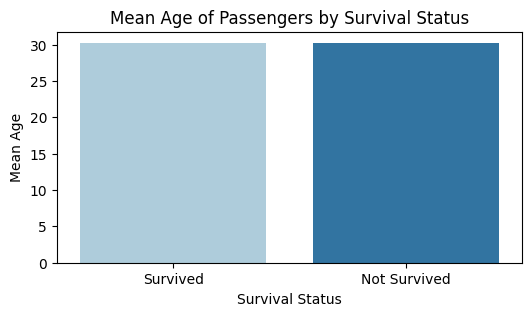

Mean age of passengers who survived: 30.27
Mean age of passengers who did not survive: 30.27


In [ ]:
# Calculate the mean age of passengers who survived and those who did not survive
mean_age_survived = df[df['Survived'] == 1]['Age'].mean()
mean_age_not_survived = df[df['Survived'] == 0]['Age'].mean()

# Create a bar plot to visualize the mean ages
plt.figure(figsize=(6, 3))
sns.barplot(x=['Survived', 'Not Survived'], y=[mean_age_survived, mean_age_not_survived], palette='Paired')
plt.title('Mean Age of Passengers by Survival Status')
plt.xlabel('Survival Status')
plt.ylabel('Mean Age')
plt.show()

# Print the mean ages
print(f'Mean age of passengers who survived: {mean_age_survived:.2f}')
print(f'Mean age of passengers who did not survive: {mean_age_not_survived:.2f}')

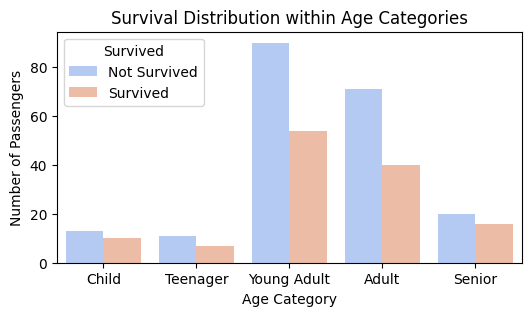

Number of Men, Women, and Children by Age Category:
Age Category  Child  Teenager  Young Adult  Adult  Senior
Sex                                                      
female           10         7           54     40      16
male             13        11           90     71      20


In [ ]:
# Define age categories
bins = [0, 12, 18, 30, 50, 100]
labels = ['Child', 'Teenager', 'Young Adult', 'Adult', 'Senior']

# Add the "Age Category" column to the DataFrame
df['Age Category'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Create a bar plot to visualize survival distribution within each age category
plt.figure(figsize=(6, 3))
sns.countplot(data=df, x='Age Category', hue='Survived', palette='coolwarm')
plt.title('Survival Distribution within Age Categories')
plt.xlabel('Age Category')
plt.ylabel('Number of Passengers')
plt.legend(title='Survived', labels=['Not Survived', 'Survived'])
plt.show()



# Count the number of men, women, and children based on sex and age category
count_by_sex_age = df.groupby(['Sex', 'Age Category']).size().unstack()

# Print the counts
print('Number of Men, Women, and Children by Age Category:')
print(count_by_sex_age)

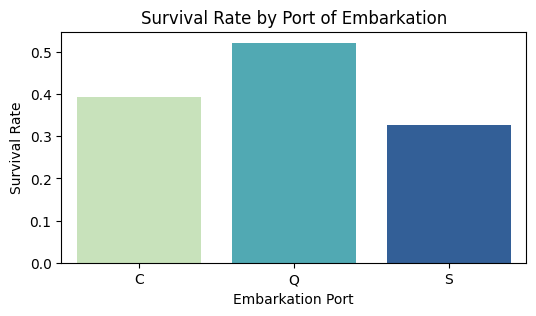

Survival Rate by Port of Embarkation:
Embarked
C    0.392157
Q    0.521739
S    0.325926
Name: Survived, dtype: float64


In [ ]:
#Survived Rate According to Port
# Calculate survival rate by port of embarkation
survival_rate_by_port = df.groupby('Embarked')['Survived'].mean()

# Create a bar plot to visualize survival rate by port of embarkation
plt.figure(figsize=(6, 3))
sns.barplot(x=survival_rate_by_port.index, y=survival_rate_by_port.values, palette='YlGnBu')
plt.title('Survival Rate by Port of Embarkation')
plt.xlabel('Embarkation Port')
plt.ylabel('Survival Rate')
plt.show()

# Print the survival rate by port of embarkation
print('Survival Rate by Port of Embarkation:')
print(survival_rate_by_port)

In [ ]:
# Print the sex ratio
print('Sex Ratio in Titanic Dataset:')
print(sex_counts)

Sex Ratio in Titanic Dataset:
male      266
female    152
Name: Sex, dtype: int64


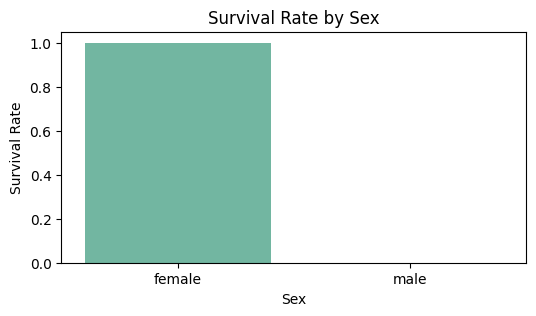

Survival Rate by Sex:
Sex
female    1.0
male      0.0
Name: Survived, dtype: float64


In [ ]:
# Calculate survival rate by sex
survival_rate_by_sex = df.groupby('Sex')['Survived'].mean()

# Create a bar plot to visualize survival rate by sex
plt.figure(figsize=(6, 3))
sns.barplot(x=survival_rate_by_sex.index, y=survival_rate_by_sex.values, palette='Set2')
plt.title('Survival Rate by Sex')
plt.xlabel('Sex')
plt.ylabel('Survival Rate')
plt.show()

# Print the survival rate by sex
print('Survival Rate by Sex:')
print(survival_rate_by_sex)

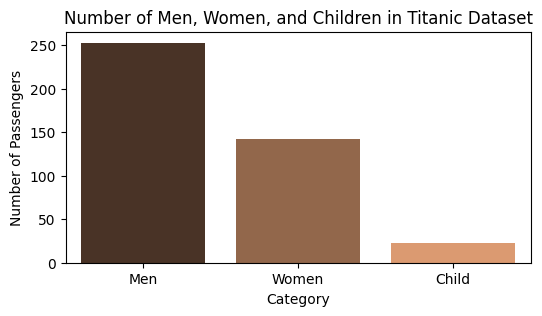

Number of Men, Women, and Children:
Men: 253
Women: 142
Children: 23


In [ ]:
# Count the number of men, women, and children
men_count = len(df[(df['Sex'] == 'male') & (df['Age Category'] != 'Child')])
women_count = len(df[(df['Sex'] == 'female') & (df['Age Category'] != 'Child')])
child_count = len(df[df['Age Category'] == 'Child'])

# Create a bar plot to visualize the count of men, women, and children
plt.figure(figsize=(6, 3))
sns.barplot(x=['Men', 'Women', 'Child'], y=[men_count, women_count, child_count], palette='copper')
plt.title('Number of Men, Women, and Children in Titanic Dataset')
plt.xlabel('Category')
plt.ylabel('Number of Passengers')
plt.show()

# Print the counts
print('Number of Men, Women, and Children:')
print(f'Men: {men_count}')
print(f'Women: {women_count}')
print(f'Children: {child_count}')

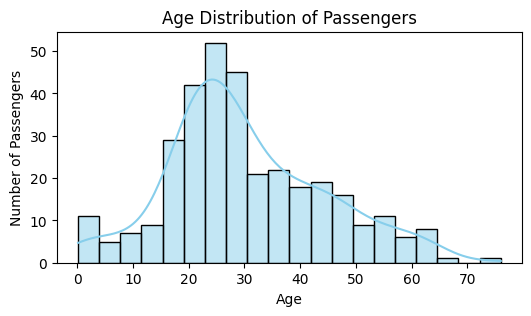

In [ ]:
# Create a histogram of passenger ages
plt.figure(figsize=(6, 3))
sns.histplot(data=df, x='Age', bins=20, kde=True, color='skyblue')
plt.title('Age Distribution of Passengers')
plt.xlabel('Age')
plt.ylabel('Number of Passengers')
plt.show()

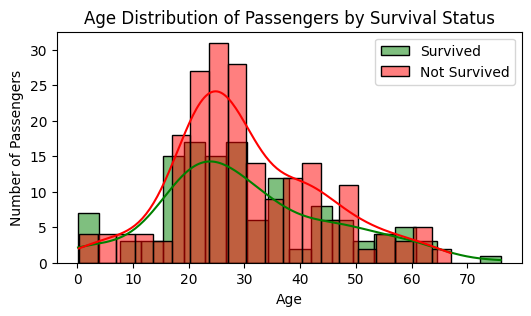

In [ ]:
# Create separate dataframes for passengers who survived and those who did not
survived = df[df['Survived'] == 1]
not_survived = df[df['Survived'] == 0]

# Create histograms to visualize the age distribution for both groups
plt.figure(figsize=(6, 3))
sns.histplot(data=survived, x='Age', bins=20, kde=True, color='green', label='Survived')
sns.histplot(data=not_survived, x='Age', bins=20, kde=True, color='red', label='Not Survived')
plt.title('Age Distribution of Passengers by Survival Status')
plt.xlabel('Age')
plt.ylabel('Number of Passengers')
plt.legend()
plt.show()

In [ ]:
df.isnull().sum()

PassengerId       0
Survived          0
Pclass            0
Name              0
Sex               0
Age              86
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin           327
Embarked          0
FamilySize        0
Age Category     86
dtype: int64

Total passengers who survived: 152
Total passengers who did not survive: 266


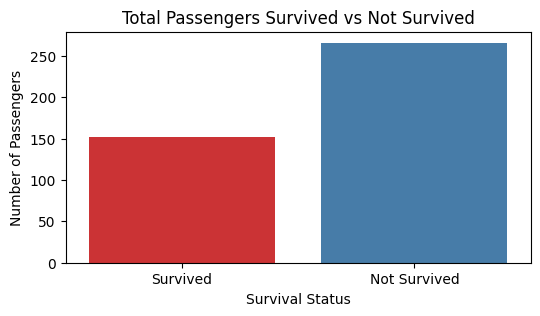

In [ ]:
def show_total_survived(data):
    total_survived = data['Survived'].sum()
    total_not_survived = data.shape[0] - total_survived

    print(f'Total passengers who survived: {total_survived}')
    print(f'Total passengers who did not survive: {total_not_survived}')

     # Create a bar plot
    plt.figure(figsize=(6, 3))
    sns.barplot(x=['Survived', 'Not Survived'], y=[total_survived, total_not_survived], palette='Set1')
    plt.title('Total Passengers Survived vs Not Survived')
    plt.xlabel('Survival Status')
    plt.ylabel('Number of Passengers')
    plt.show()

# Call the function with your Titanic dataset
show_total_survived(df)

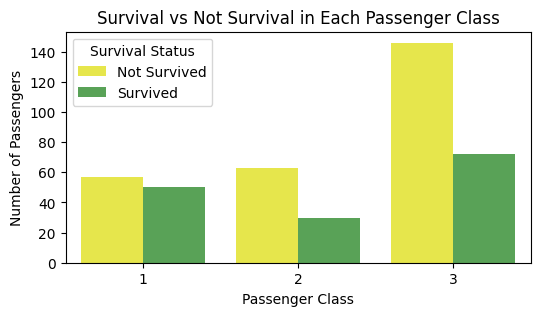

In [ ]:
def survival_vs_not_survival_by_class(data):
    plt.figure(figsize=(6, 3))
    sns.countplot(data=data, x='Pclass', hue='Survived', palette='Set1_r')
    plt.title('Survival vs Not Survival in Each Passenger Class')
    plt.xlabel('Passenger Class')
    plt.ylabel('Number of Passengers')
    plt.legend(title='Survival Status', labels=['Not Survived', 'Survived'])
    plt.show()

# Call the function with your Titanic dataset
survival_vs_not_survival_by_class(df)

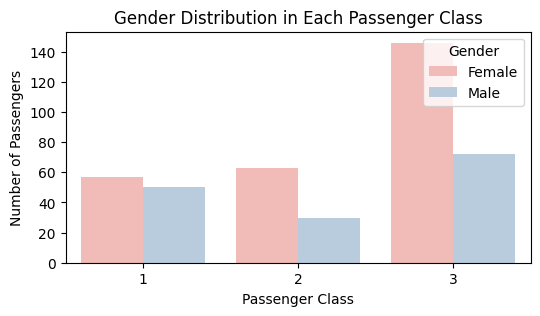

In [ ]:
def gender_distribution_by_class(data):
    plt.figure(figsize=(6, 3))
    sns.countplot(data=data, x='Pclass', hue='Sex', palette='Pastel1')
    plt.title('Gender Distribution in Each Passenger Class')
    plt.xlabel('Passenger Class')
    plt.ylabel('Number of Passengers')
    plt.legend(title='Gender', labels=['Female', 'Male'], loc='upper right')
    plt.show()

# Call the function with your Titanic dataset
gender_distribution_by_class(df)

In [ ]:
train_corr = df[['Survived', 'Age', 'Fare'
                      ]].corr(method='spearman').abs().unstack().sort_values(
                          kind='quicksort', ascending=False).reset_index()
train_corr.rename(columns={
    'level_0': 'Feature A',
    'level_1': 'Feature B',
    0: 'Correlation Coefficient'
},
                  inplace=True)
train_corr[(train_corr['Feature A'] == 'Survived')].style.background_gradient(
    cmap='summer_r')

,Feature A,Feature B,Correlation Coefficient
0,Survived,Survived,1.000000
5,Survived,Fare,0.204978
7,Survived,Age,0.020605


In [ ]:
# Select columns of interest
selected_columns = ['Survived', 'Age', 'Fare']
selected_data = df[selected_columns]

# Calculate correlations between selected features
correlations = selected_data.corr()

# Print the correlations
print('Correlation between selected features:')
print(correlations)

Correlation between selected features:
          Survived       Age      Fare
Survived  1.000000 -0.000013  0.191514
Age      -0.000013  1.000000  0.337932
Fare      0.191514  0.337932  1.000000


In [ ]:
df.isnull().sum()

PassengerId       0
Survived          0
Pclass            0
Name              0
Sex               0
Age              86
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin           327
Embarked          0
FamilySize        0
Age Category     86
dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
df= df.drop(columns='Cabin', axis=1)

# Print the updated DataFrame
print(df.head())

   PassengerId  Survived  Pclass  \
0          892         0       3   
1          893         1       3   
2          894         0       2   
3          895         0       3   
4          896         1       3   

                                           Name     Sex   Age  SibSp  Parch  \
0                              Kelly, Mr. James    male  34.5      0      0   
1              Wilkes, Mrs. James (Ellen Needs)  female  47.0      1      0   
2                     Myles, Mr. Thomas Francis    male  62.0      0      0   
3                              Wirz, Mr. Albert    male  27.0      0      0   
4  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1      1   

    Ticket     Fare Embarked  FamilySize Age Category  
0   330911   7.8292        Q           1        Adult  
1   363272   7.0000        S           2        Adult  
2   240276   9.6875        Q           1       Senior  
3   315154   8.6625        S           1  Young Adult  
4  3101298  12.2875        S

In [ ]:
df['Age'].fillna(df['Age'].mean(), inplace=True)

In [ ]:
print(df['Embarked'].mode())

0    S
Name: Embarked, dtype: object


In [ ]:
df['Age Category'].fillna(df['Age Category'].mode()[0], inplace=True)

In [ ]:
median_fare = df['Fare'].median()
df['Fare'].fillna(median_fare, inplace=True)

In [ ]:
df.isnull().sum()

PassengerId     0
Survived        0
Pclass          0
Name            0
Sex             0
Age             0
SibSp           0
Parch           0
Ticket          0
Fare            0
Embarked        0
FamilySize      0
Age Category    0
dtype: int64

In [ ]:
# Verify that missing values have been handled
missing_values = df.isnull().sum()
print(missing_values)

PassengerId     0
Survived        0
Pclass          0
Name            0
Sex             0
Age             0
SibSp           0
Parch           0
Ticket          0
Fare            0
Embarked        0
FamilySize      0
Age Category    0
dtype: int64


In [ ]:
df.replace({'Sex':{'male':0,'female':1}, 'Embarked':{'S':0,'C':1,'Q':2}}, inplace=True)

In [ ]:
#X=df.drop(columns=["PassengerId","Survived","Name","Ticket","Age Category","FamilySize","Name_pre"])

X=df.drop(columns=["PassengerId","Survived","Name","Ticket","Age Category","FamilySize"])
Y=df["Survived"]

# Split the data into features (X) and target (Y)
#X = df.drop(columns=["PassengerId", "Survived", "Name", "Ticket", "Age " "Name_pre"])
#Y = df["Survived"]
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,34.50000,0,0,7.8292,2
1,3,1,47.00000,1,0,7.0000,0
2,2,0,62.00000,0,0,9.6875,2
3,3,0,27.00000,0,0,8.6625,0
4,3,1,22.00000,1,1,12.2875,0
...,...,...,...,...,...,...,...
413,3,0,30.27259,0,0,8.0500,0
414,1,1,39.00000,0,0,108.9000,1
415,3,0,38.50000,0,0,7.2500,0
416,3,0,30.27259,0,0,8.0500,0


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(418, 7) (334, 7) (84, 7)


In [ ]:
model = LogisticRegression()

In [ ]:
model.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
LogisticRegression()

LogisticRegression()

In [ ]:
X_train_prediction = model.predict(X_train)
print(X_train_prediction)

[1 1 0 0 1 1 0 0 0 1 0 0 1 0 0 0 1 0 1 0 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0
 1 1 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 1 0 1 1 1 0 1
 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 1 0 0 0 0 0 0 0 1 0 1 1 1 0 1 0 1 0
 1 1 0 0 0 0 1 1 0 1 0 0 1 1 0 1 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 1 0 1 1 0 0
 0 0 1 1 1 0 0 1 1 0 1 1 0 0 0 0 0 0 0 1 1 0 0 1 1 1 1 0 1 0 0 0 0 1 0 1 1
 1 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 0 1 0 0 1 0 0
 1 0 1 0 0 0 0 0 1 0 0 0 1 1 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1
 0 1 1 1 1 0 0 0 1 1 0 0 1 0 1 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 1 0 1 1 0 0 0
 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 1 1 0 0 0 1 1 1
 1]


In [ ]:
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)
print('Accuracy score of training data : ', training_data_accuracy)

Accuracy score of training data :  1.0


In [ ]:
# accuracy on test data
X_test_prediction = model.predict(X_test)
print(X_test_prediction)

[0 0 0 1 1 0 1 0 0 1 0 1 1 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 1 1 0 1 0 0 1
 1 0 0 0 0 1 1 0 0 1 0 1 0 0 0 1 1 1 0 0 1 0 0 0 0 0 0 1 0 1 1 1 1 1 1 0 0
 0 1 1 0 1 0 0 0 0 0]


In [ ]:
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)
print('Accuracy score of test data : ', test_data_accuracy)

Accuracy score of test data :  1.0


In [ ]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,34.5,0,0,7.8292,2
1,3,1,47.0,1,0,7.0000,0
2,2,0,62.0,0,0,9.6875,2
3,3,0,27.0,0,0,8.6625,0
4,3,1,22.0,1,1,12.2875,0


In [ ]:
data={"Pclass":1,"Sex":1,"Age":32.0,"SibSp":2,"Parch":1,"Fare":7.9250,"Embarked":1}
new_df2=pd.DataFrame(data,index=[0])
new_df2

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,1,32.0,2,1,7.925,1


In [ ]:
predi=model.predict(new_df2)
if predi==1:
    print("This Person is Survived")
else:
    print("This person is Not Survived")

This Person is Survived
